# SoilSpecTfm


> A Python package providing scikit-learn compatible transforms for spectroscopic data preprocessing. 

It's designed to work seamlessly with both MIR (Mid-Infrared) and VISNIR (Visible-Near Infrared) spectral data.

**WORK IN PROGRESS**

## Installation


```bash
pip install soilspectfm
```


## Quick Start

In [ ]:
#| eval: false
from soilspectfm.core import SNV, TakeDerivative, ToAbsorbance
from sklearn.pipeline import Pipeline

### Loading OSSL dataset

Let's use OSSL dataset as an example using [SoilSpecData](https://fr.anckalbi.net/soilspecdata/) package.

In [ ]:
#| eval: false
from soilspecdata.datasets.ossl import get_ossl

In [ ]:
#| eval: false
ossl = get_ossl()
mir_data = ossl.get_mir()

### Preprocessing pipeline

Implemented transforms developed so far include:

- **Baseline corrections**:
  
  - [x] `SNV`: Standard Normal Variate
  - [x] `MSC`: Multiplicative Scatter Correction
  - [ ] `Detrend`: Detrend the spectrum (SOON)
  - [ ] `ALS`: Asymmetric Least Squares detrend the spectrum (SOON)


- **Derivatives**:
  
  - [x] `TakeDerivative`: Take derivative (1st, 2nd, etc.) of the spectrum and apply Savitzky-Golay smoothing
  - [ ] `GapSegmentDerivative`: ...

- **Smoothing**:
  - [ ] `WaveletDenoise`: Wavelet denoising
  - [ ] `SavGolSmooth`: Savitzky-Golay smoothing
  

- **Other transformations**:
  - [x] `ToAbsorbance`: Transform the spectrum to absorbance
  - [ ] `Resample`: Resample the spectrum to a new wavenumber range


Transforms are fully compatible with [scikit-learn](https://scikit-learn.org/stable/) and can be used in a pipeline as follows:

In [ ]:
#| eval: false
pipe = Pipeline([
    ('snv', SNV()), # Standard Normal Variate transformation
    ('deriv', TakeDerivative(window_length=11, polyorder=2, deriv=1)) # First derivative
])

X_tfm = pipe.fit_transform(mir_data.spectra)

### Quick visualization

In [ ]:
#| eval: false
from soilspectfm.visualization import plot_spectra
from matplotlib import pyplot as plt

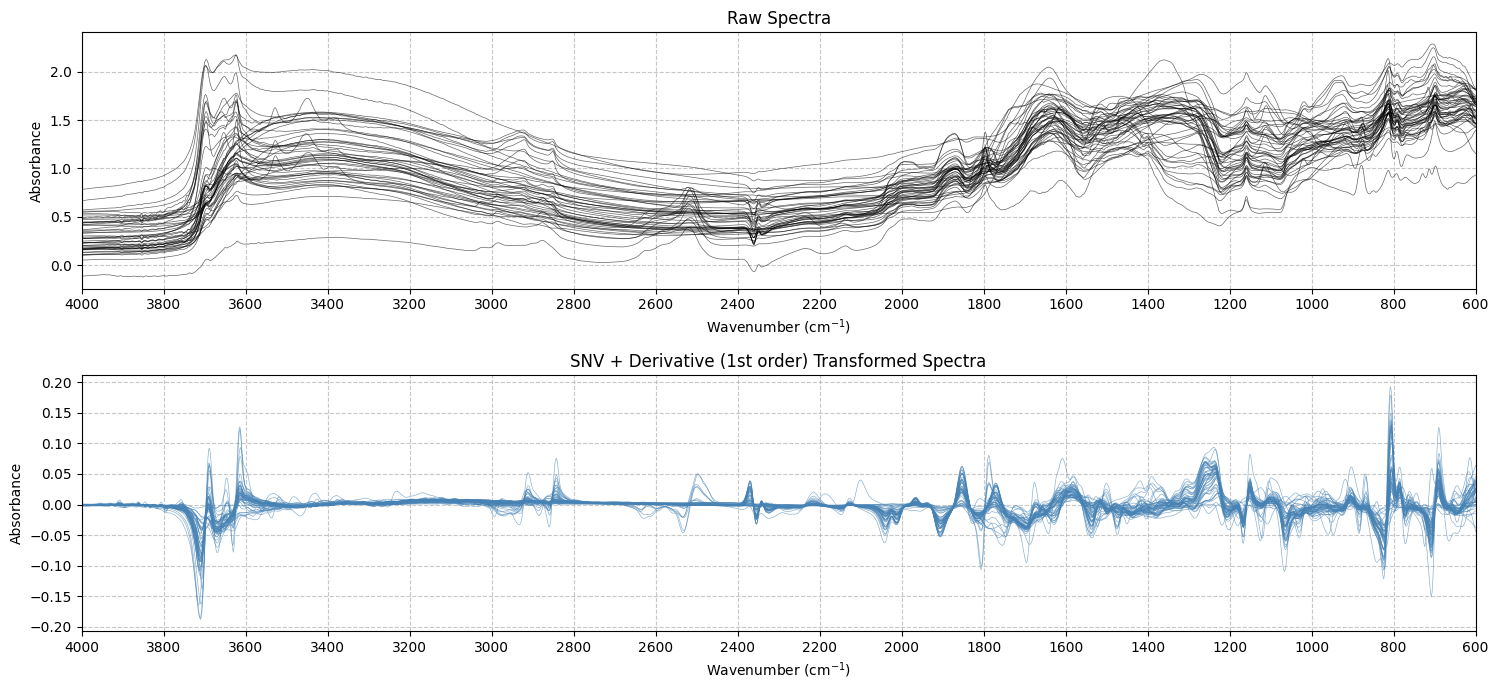

In [ ]:
#| eval: false
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7))

ax1 = plot_spectra(
    mir_data.spectra, 
    mir_data.wavenumbers,
    ax=ax1,
    ascending=False,
    color='black',
    alpha=0.6,
    lw=0.5,
    xlabel='Wavenumber (cm$^{-1}$)',
    title='Raw Spectra'
)

ax2 = plot_spectra(
    X_tfm,
    mir_data.wavenumbers,
    ax=ax2,
    ascending=False,
    color='steelblue',
    alpha=0.6,
    lw=0.5,
    xlabel='Wavenumber (cm$^{-1}$)',
    title='SNV + Derivative (1st order) Transformed Spectra'
)

plt.tight_layout()

## Dependencies
- fastcore
- numpy
- scipy
- scikit-learn
- matplotlib

## Further references

- https://orange-spectroscopy.readthedocs.io/en/latest/widgets/preprocess-spectra.html

## Contributing


### Developer guide

If you are new to using `nbdev` here are some useful pointers to get you started.

Install spectfm in Development mode:

```sh
# make sure spectfm package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to spectfm
$ nbdev_prepare
```

## License

This project is licensed under the Apache2 License - see the LICENSE file for details.

## Support

For questions and support, please [open an issue](https://github.com/franckalbinet/spectfm/issues) on GitHub.
